##**Oversamling**

This code does the following:

- Dataset Creation: It starts by generating a synthetic, two-dimensional, and imbalanced dataset using make_classification.
- Oversampling Methods: It then defines the oversampling techniques to be compared: SMOTE, Borderline-SMOTE, and ADASYN, along with the original dataset for reference.
- Visualization: For each method, it applies oversampling (if applicable) and visualizes the distribution of the two classes in a scatter plot.

The plots show the effect of each oversampling technique on the class distribution, allowing you to visually compare how each method addresses the imbalance problem.


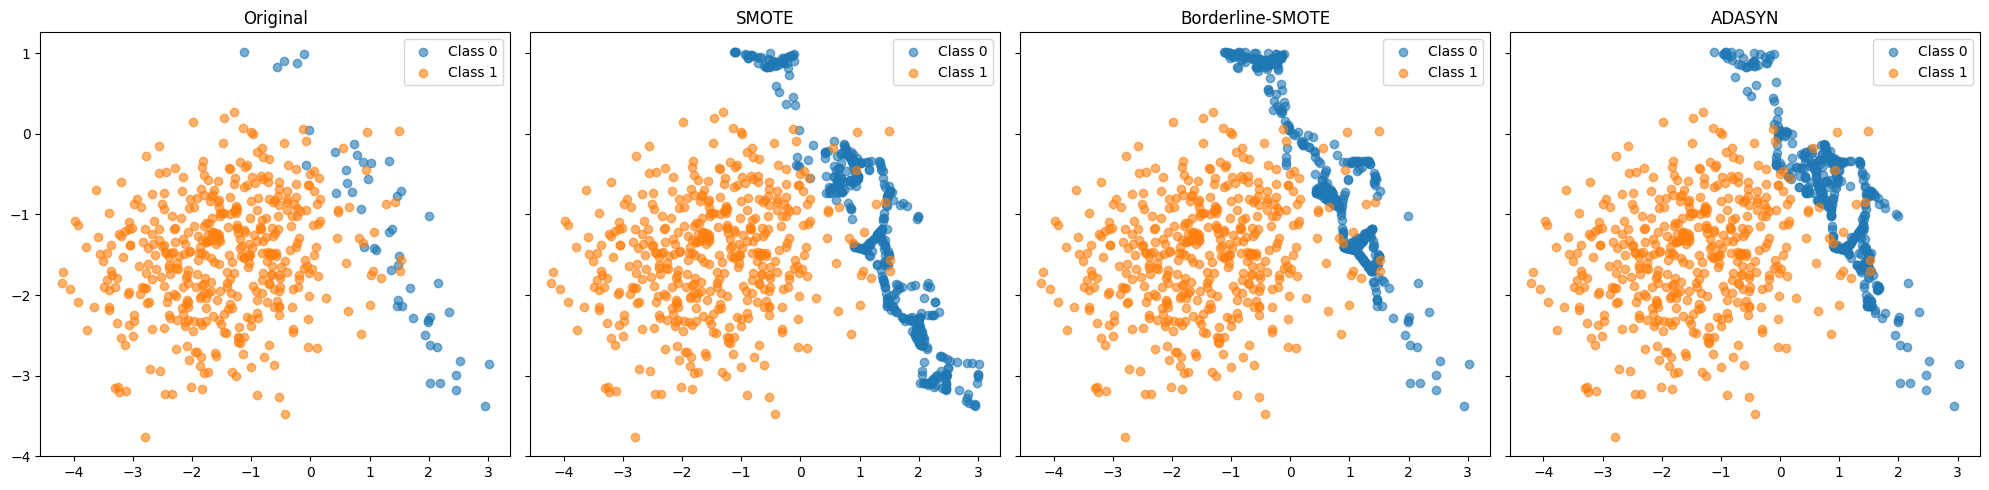

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
import matplotlib.pyplot as plt

# Adjusting the dataset characteristics
X, y = make_classification(n_classes=2, class_sep=1.5, # Adjusted class separation
                           weights=[0.1, 0.9], n_informative=2, n_redundant=0, flip_y=0,
                           n_features=2, n_clusters_per_class=1, n_samples=500, # Increased sample size
                           random_state=10)

oversamplers = {
    "Original": (X, y),
    "SMOTE": SMOTE(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42)
}

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axs = axs.ravel()

for i, (title, os) in enumerate(oversamplers.items()):
    if title == "Original":
        X_res, y_res = X, y
    else:
        X_res, y_res = os.fit_resample(X, y)

    axs[i].scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label="Class 0", alpha=0.6)
    axs[i].scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label="Class 1", alpha=0.6)
    axs[i].set_title(title)
    axs[i].legend()

plt.tight_layout()
plt.show()

